In [3]:
# 0. IMPORTS & CONFIG
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [5]:
# ======================
# 1. DATA PREPARATION
# ======================
# Load and preprocess data
df = pd.read_csv('dataset/smart_home_energy_consumption_large.csv')
df = df[['Appliance Type', 'Energy Consumption (kWh)', 'Season', 'Household Size']]

# Encode categorical features
df = pd.get_dummies(df, columns=['Appliance Type', 'Season'], drop_first=True)

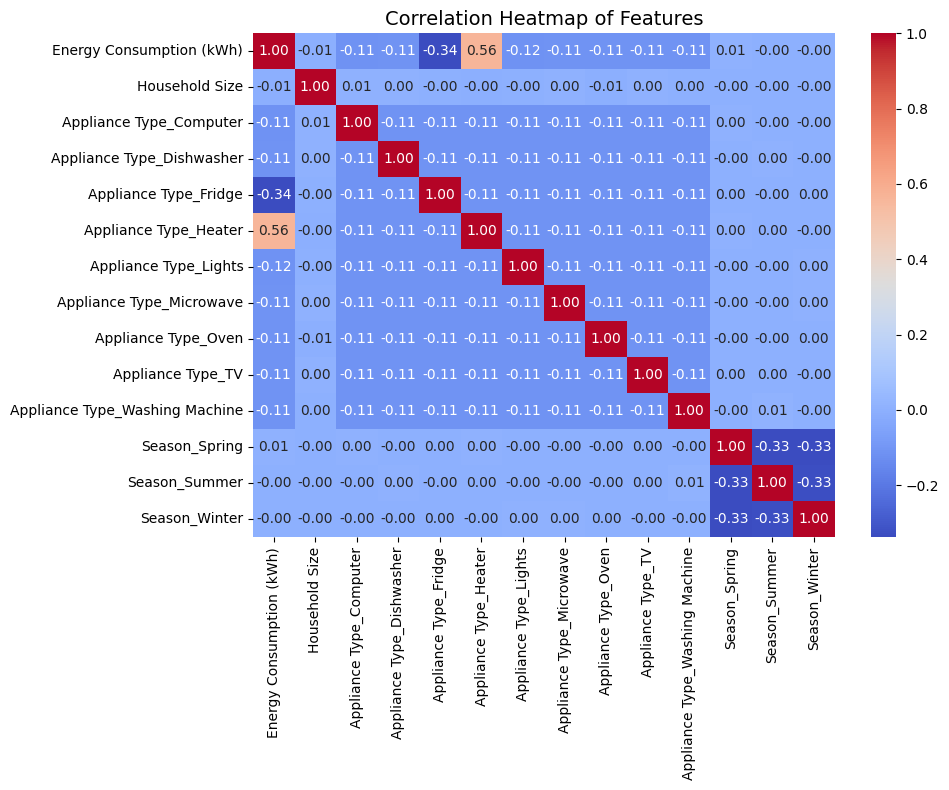

In [6]:
# ======================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ======================
# Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.tight_layout()
plt.show()


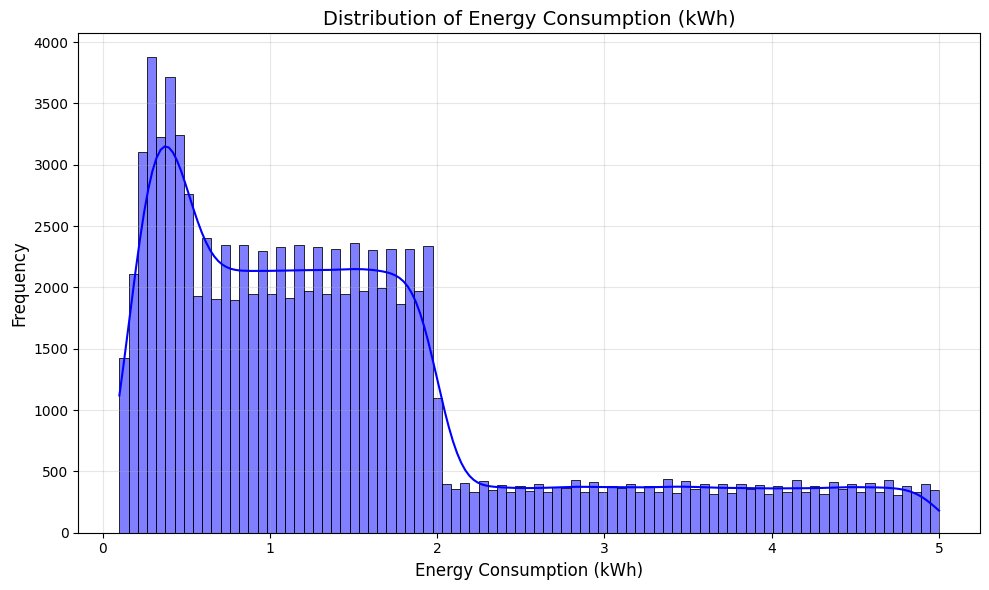

In [7]:
# Visualization 2: Distribution of Energy Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy Consumption (kWh)'], kde=True, color='blue')
plt.title('Distribution of Energy Consumption (kWh)', fontsize=14)
plt.xlabel('Energy Consumption (kWh)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [8]:
# ======================
# 3. DATA SPLITTING & SCALING
# ======================
# Define features (X) and target (y)
X = df.drop('Energy Consumption (kWh)', axis=1)
y = df['Energy Consumption (kWh)']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# ======================
# 4. MODEL TRAINING
# ======================
models = {
    'Linear Regression': SGDRegressor(max_iter=1000, tol=1e-3),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

best_model = None
lowest_loss = float('inf')
model_performance = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    model_performance[name] = loss
    
    print(f"{name} Performance:")
    print(f"- MSE: {loss:.4f}")
    print(f"- RMSE: {np.sqrt(loss):.4f}\n")
    
    if loss < lowest_loss:
        best_model = model
        lowest_loss = loss
        best_model_name = name

Linear Regression Performance:
- MSE: 0.3417
- RMSE: 0.5845

Random Forest Performance:
- MSE: 0.3415
- RMSE: 0.5844

Decision Tree Performance:
- MSE: 0.3415
- RMSE: 0.5844



In [10]:
# ======================
# 5. MODEL PERSISTENCE
# ======================
joblib.dump({
    'model': best_model,
    'scaler': scaler,
    'feature_names': X.columns.tolist()
}, 'best_model.pkl')

print(f"Saved best model: {best_model_name} with MSE: {lowest_loss:.4f}")

Saved best model: Random Forest with MSE: 0.3415


In [11]:
# ======================
# 6. SINGLE PREDICTION
# ======================
# Get first test sample
sample = X_test[0].reshape(1, -1)
print(sample)
true_value = y_test.iloc[0]

# Make prediction
prediction = best_model.predict(sample)
print(f"\nSingle Prediction Demo:")
print(f"- Actual value: {true_value:.2f} kWh")
print(f"- Predicted value: {prediction[0]:.2f} kWh")
print(f"- Error: {abs(true_value - prediction[0]):.2f} kWh")

[[-1.41358901 -0.33219791 -0.33573557 -0.33268481 -0.33314812 -0.33661075
  -0.33222111  3.02761887 -0.33171059 -0.33372671  1.72126411 -0.57615708
  -0.57575293]]

Single Prediction Demo:
- Actual value: 1.58 kWh
- Predicted value: 1.09 kWh
- Error: 0.49 kWh


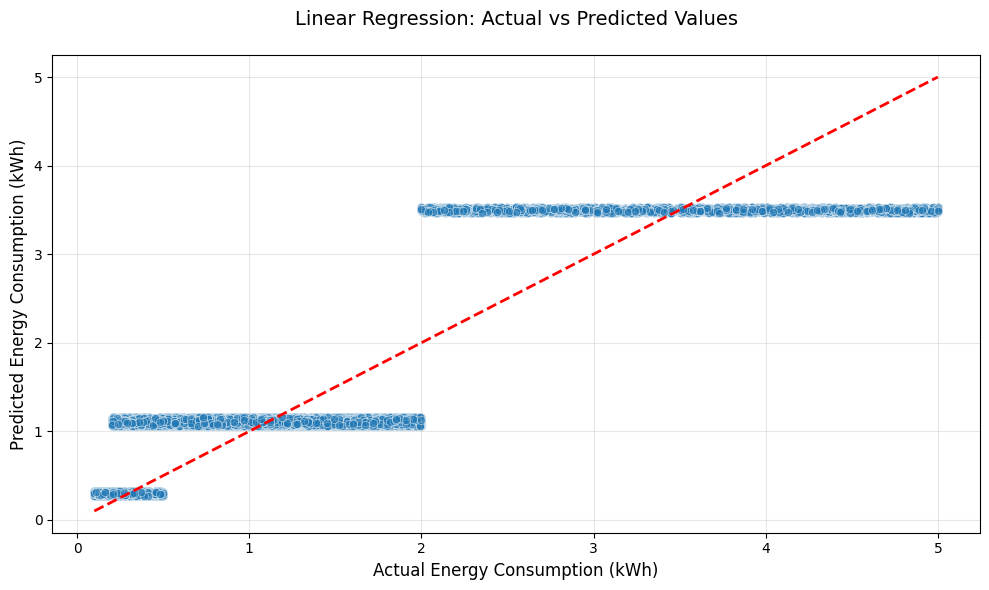

In [12]:
# ======================
# 7. VISUALIZATION
# ======================
# Linear regression visualization
linear_model = models['Linear Regression']
preds = linear_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=preds, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted Values\n', fontsize=14)
plt.xlabel('Actual Energy Consumption (kWh)', fontsize=12)
plt.ylabel('Predicted Energy Consumption (kWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()